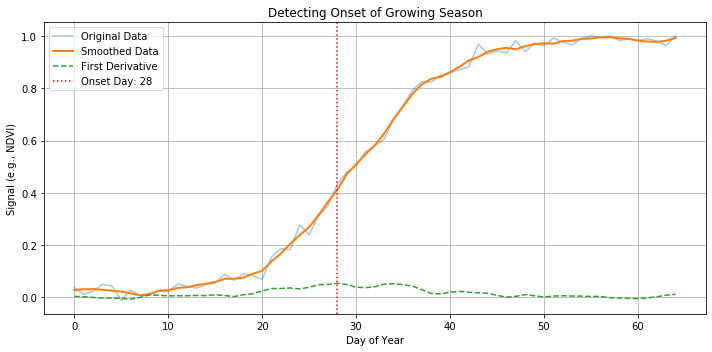

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Example: simulate a green-up curve (e.g., NDVI-like)
np.random.seed(0)
days = np.arange(65)
# Synthetic sigmoid curve + noise
data = 1 / (1 + np.exp(-(days - 30) / 5)) + np.random.normal(0, 0.02, size=65)

# Step 1: Smooth the data
smoothed = savgol_filter(data, window_length=9, polyorder=3)

# Step 2: Compute first derivative
first_derivative = np.gradient(smoothed)

# Step 3: Detect point of maximum positive slope (onset of greening)
onset_day = np.argmax(first_derivative)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(days, data, label='Original Data', alpha=0.4)
plt.plot(days, smoothed, label='Smoothed Data', linewidth=2)
plt.plot(days, first_derivative, label='First Derivative', linestyle='--')
plt.axvline(onset_day, color='red', linestyle=':', label=f'Onset Day: {onset_day}')
plt.xlabel('Day of Year')
plt.ylabel('Signal (e.g., NDVI)')
plt.title('Detecting Onset of Growing Season')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [3]:
print(f"Estimated onset of growing season is Day {onset_day}")


Estimated onset of growing season is Day 28


Onset of growing season *may* have started on day(s): [60 61 62 63 64]


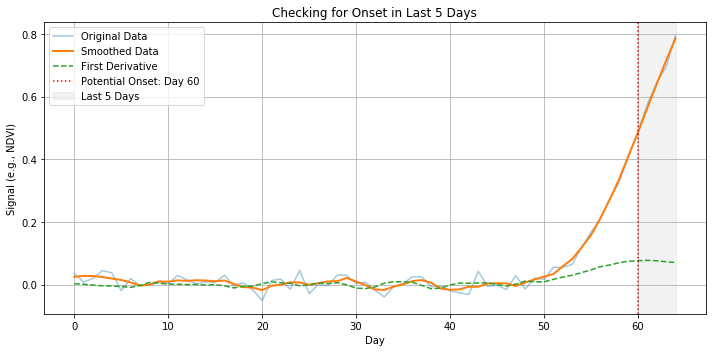

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Simulated green-up curve
np.random.seed(0)
days = np.arange(65)
data = 1 / (1 + np.exp(-(days - 60) / 3)) + np.random.normal(0, 0.02, size=65)  # Onset near end

# Smooth the data
smoothed = savgol_filter(data, window_length=9, polyorder=3)

# Calculate first derivative (rate of change)
first_derivative = np.gradient(smoothed)

# Define threshold for slope (tune as needed)
slope_threshold = 0.01

# Check last 5 days
last_5_days = np.arange(60, 65)
slope_last_5_days = first_derivative[60:]

# Detect if any slope exceeds the threshold
onset_candidates = last_5_days[slope_last_5_days > slope_threshold]

# Output result
if len(onset_candidates) > 0:
    print(f"Onset of growing season *may* have started on day(s): {onset_candidates}")
    onset_day = onset_candidates[0]
else:
    print("No significant onset detected in the last 5 days.")
    onset_day = None

# Plot
plt.figure(figsize=(10, 5))
plt.plot(days, data, label='Original Data', alpha=0.4)
plt.plot(days, smoothed, label='Smoothed Data', linewidth=2)
plt.plot(days, first_derivative, label='First Derivative', linestyle='--')
if onset_day is not None:
    plt.axvline(onset_day, color='red', linestyle=':', label=f'Potential Onset: Day {onset_day}')
plt.axvspan(60, 64, color='gray', alpha=0.1, label='Last 5 Days')
plt.xlabel('Day')
plt.ylabel('Signal (e.g., NDVI)')
plt.title('Checking for Onset in Last 5 Days')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
